In [87]:
# Import dependencies including pandas and matplotlib for visualization
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import colorama
from colorama import Fore

In [88]:
# Create path to the url, read the webpage
executable_path = {"executable_path": ChromeDriverManager().install()}
browser = Browser("chrome", **executable_path, headless=False)
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [89]:
# Parse Html
html = browser.html
mars_soup = soup(html, 'html.parser')

In [4]:
# Retrieve the whole table from the webpage using BeautifulSoup
table = mars_soup.find('table', class_='table')

In [5]:
# Create an empty list to hold headers
header_list = []

# Find all headers from the table
headers = table.find_all('th')

# iterate over headers and populate the empty list
for header in headers:
    header_list.append(header.text)
    
header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [6]:
# Create an empty list to hold row data
row_list = []
# Find all the rows 
table_rows = table.find_all('tr', class_='data-row')
# Iterate over table rows, strip the data and append to the list
for row in table_rows:
    rows = row.find_all('td')
    row_info = [info.text.strip() for info in rows if info]
    row_list.append(row_info)

In [7]:
#Quit
browser.quit()

In [8]:
# Turn the scraped data into pandas dataframe
final_df = pd.DataFrame(row_list, columns=header_list)

In [82]:
final_df.tail()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


In [11]:
# Check the data types
final_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# change dtypes into appropriate types
mars_df = final_df.astype({'id': int, 'sol': int,'ls': int, 'month': int, 'min_temp': float, 'pressure':float})
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [13]:
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [44]:
# 6: How many months exist on Mars?
months_on_mars = mars_df['month'].nunique()
print(f'{Fore.GREEN} There are {months_on_mars} months on Mars')

 There are 12 months on Mars


In [15]:
# 7: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
days_dataset = mars_df['sol'].max()
print(f'{Fore.BLUE}There are {days_dataset} days worth of data in this scraped dataset')

There are 1977 days worth of data in this scraped dataset


In [151]:
# 8: What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Declare a list to hold average demperatures
avg_temp = []

# iterate over 12 months
for month in range(1,13):
    # Get the average for each month using **loc**
    per_month = mars_df.loc[mars_df['month'] == month]['min_temp'].mean()
    # Assign months and average temps to a dict
    avg_month = {
        "months": month,
        "temps": round(per_month,2)
    }
    # Append the dict to the list
    avg_temp.append(avg_month)
#Convert to dataframe
avg_df = pd.DataFrame(avg_temp)

In [152]:
# Max and Min temps from the df
coldest = min(avg_df['temps'])
warmest = max(avg_df['temps'])

print(f'{Fore.GREEN}The third month has the coldest temperature of: {coldest}')
print(f"The 8th month is the warmest: {warmest}")

The third month has the coldest temperature of: -83.31
The 8th month is the warmest: -68.38


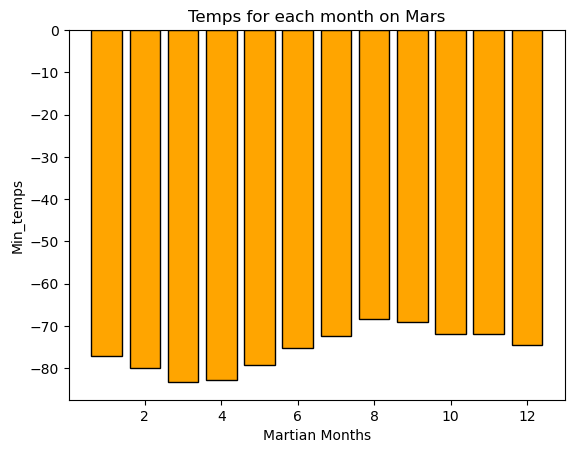

In [53]:
# Plot the temperatures for each Martian Month
plt.bar(avg_df['months'], avg_df['temps'], color='orange', edgecolor='black')
plt.xlabel("Martian Months")
plt.ylabel("Min_temps")
plt.title("Temps for each month on Mars")
plt.show()

In [153]:
# 8: Which months have the lowest and the highest atmospheric pressure on Mars?

# An empty list to assign atmospheric pressure later on
atm_pressure = []

# Iterate over each Martian month
for month in range(1,months_on_mars+1):
    # Get the avg monthly pressure by accessing the appropriate columns
    monthly_pr = mars_df.loc[mars_df['month'] == month]['pressure'].mean()
    # Assign avg_pressure to a dict
    average_pr = {
        "months": month,
        "pressure": round(monthly_pr,2)
    }
    # Append the dict to the list created above
    atm_pressure.append(average_pr)
# List to df
pressure_df = pd.DataFrame(atm_pressure)
pressure_df


,months,pressure
0,1,862.49
1,2,889.46
2,3,877.32
3,4,806.33
4,5,748.56
5,6,745.05
6,7,795.11
7,8,873.83
8,9,913.31
9,10,887.31


In [70]:
# MAX and MIN atmospheric pressure
high = max(pressure_df['pressure'])
low = min(pressure_df['pressure'])
print(f'{Fore.BLUE}The maximum atmospheric pressure is: {high}')
print(f'The min atmospheric pressure is: {low}')

The maximum atmospheric pressure is: 913.31
The min atmospheric pressure is: 745.05


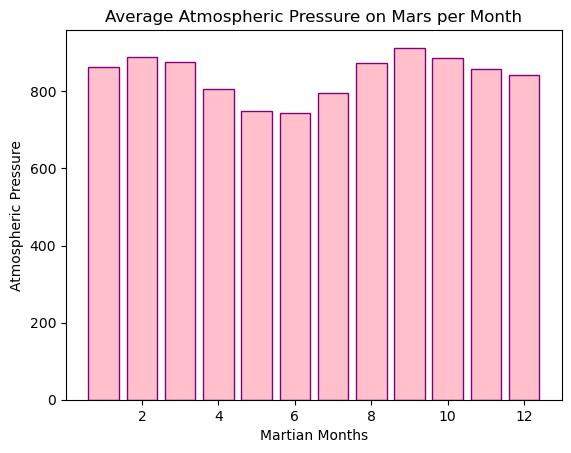

In [149]:
# Plot a bar chart showing the avg atmospheric pressure over months
plt.bar(pressure_df['months'], pressure_df['pressure'], color="pink", edgecolor='purple')
plt.xlabel("Martian Months")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Atmospheric Pressure on Mars per Month")
plt.show()

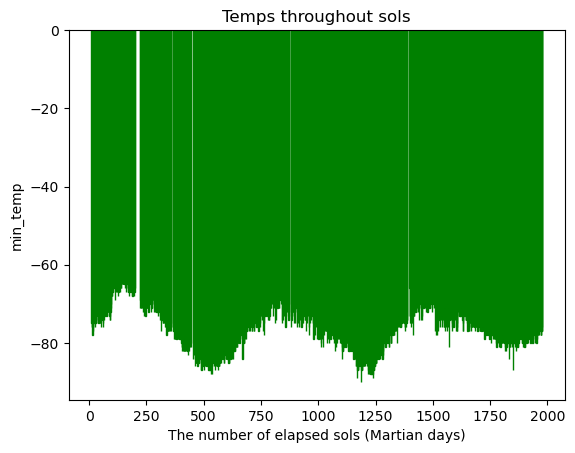

In [112]:
# 9: About how many terrestrial (Earth) days exist in a Martian year? 
# Plot a bar chart comparing temperatures over sols to retrieve apporximate number of seasons
plt.bar(mars_df['sol'], mars_df['min_temp'], edgecolor='green')
plt.xlabel("The number of elapsed sols (Martian days)")
plt.ylabel("min_temp")
plt.title("Temps throughout sols")
plt.show()


In [148]:
print("Terrestrial date shows about 6 years of data, that had to result in about 24 earth seasons")
print(f"However, from the graph and the table we can observe __almost__ 3 seasons throughout 1977 sols\
{Fore.BLUE} DUE TO partial data")
print(f"{Fore.GREEN}Thus, the approximate number of days in a Martian year is about {round(1977/2.88, 0)}")

Terrestrial date shows about 6 years of data, that had to result in about 24 earth seasons
However, from the graph and the table we can observe __almost__ 3 seasons throughout 1977 sols DUE TO partial data
Thus, the approximate number of days in a Martian year is about 686.0
